In [1]:
import pandas as pd

In [2]:
## Data Ingestions step
df=pd.read_csv('data/gemstone.csv')
df.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772


In [6]:
df.isnull().sum() #check if any null values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
df.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772


In [10]:
df.drop('id',axis=1,inplace=True)
df.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772


In [11]:
df.duplicated().sum()

0

In [13]:
numerical_coloumns=df.columns[df.dtypes!='object']
categorical_coloumns=df.columns[df.dtypes=='object']


In [15]:
print(categorical_coloumns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [16]:
print(numerical_coloumns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [17]:
df[categorical_coloumns].describe() #we can only do discribe for categorical values when all are of same dtype

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [19]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

C:\Users\lavan\AppData\Local\Temp\ipykernel_3564\2373734137.py:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', False)
c:\Users\lavan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lavan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lavan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

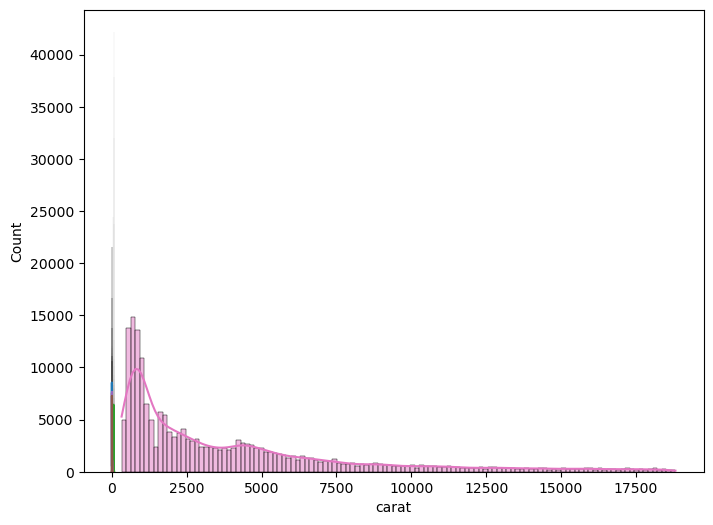

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
pd.set_option('mode.use_inf_as_na', False)
for i in numerical_coloumns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show
          

<Axes: xlabel='color', ylabel='count'>

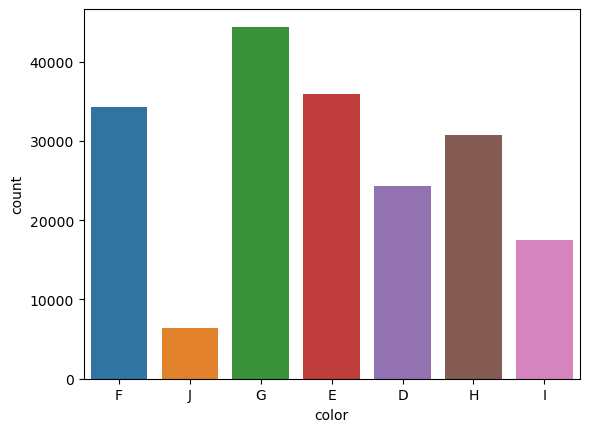

In [30]:
sns.countplot(data=df,x='color')

In [32]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Premium'

<Axes: >

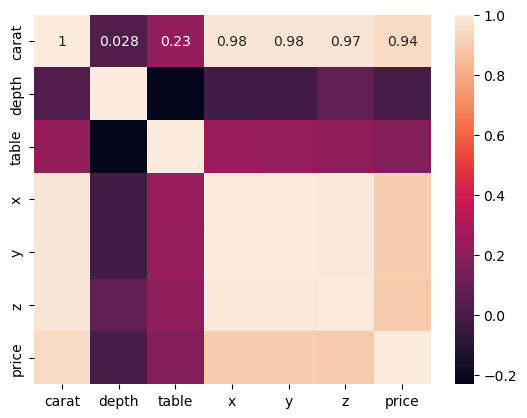

In [36]:
sns.heatmap(df[numerical_coloumns].corr(),annot=True)

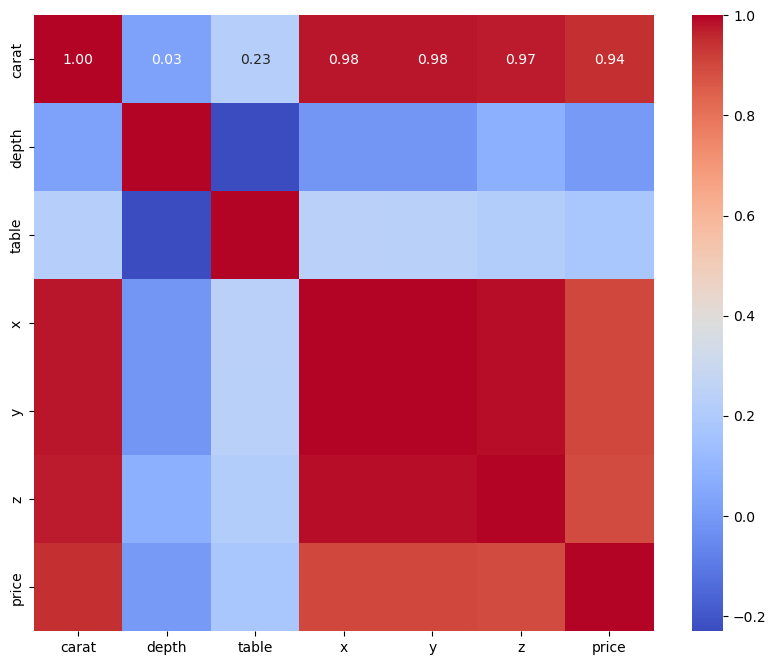

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_coloumns].corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.show()

In [43]:
df[numerical_coloumns].dtypes

carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
price      int64
dtype: object

In [45]:
sns.heatmap(df['carat','depth'].corr(),annot=True)

KeyError: ('carat', 'depth')

In [46]:
df.head(4)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666


In [47]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [48]:
cut_map={'Premium':4, 'Very Good':3, 'Ideal':5, 'Good':2, 'Fair':1}

In [49]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [50]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [51]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [52]:
df.head(4)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
